In [2]:
# Imporrtation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# charger le dataset

data = pd.read_csv("/Users/tiger/Documents/tweet_project/data/train.csv")
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Exploratory Data Analysis (EDA)

In [7]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
data.info() # on a 2 colonne de données numerique et 3 de données categorique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
#data["id"].nunique() # nombre d'utilisateurs unique
sum(data.isna().sum())

2594

In [8]:
# Suppression colonne
data = data.drop(columns ="location") # on suprime la colonne "location" car elle ne nous servira pas

In [9]:
#donne manquante
data.isna()  
data.isna().sum()  # les colonnes "keyword" et "location" comporte des données manquantes

id          0
keyword    61
text        0
target      0
dtype: int64

In [10]:
#donne manquante

data.dropna(inplace = True)

In [11]:
# Doublant
data.duplicated().sum() # pas de doublant

0

# Repartition du label

<Axes: ylabel='count'>

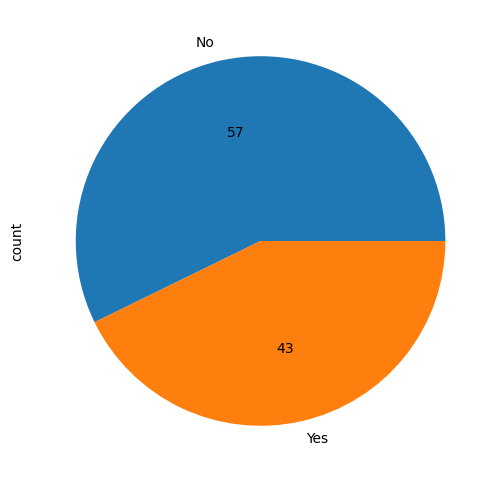

In [13]:
data["target"].value_counts().plot(kind="pie", figsize=(6,6),autopct="%1.0f", 
                            labels=["No","Yes"])

<Axes: >

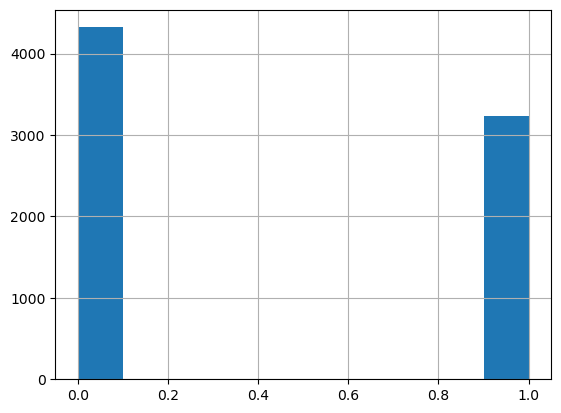

In [14]:
data["target"].hist()

In [15]:
data["target"].value_counts()

target
0    4323
1    3229
Name: count, dtype: int64

# Keyword analise

In [17]:
data["keyword"].unique() # filtrer les differents "keyword" utilisé

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

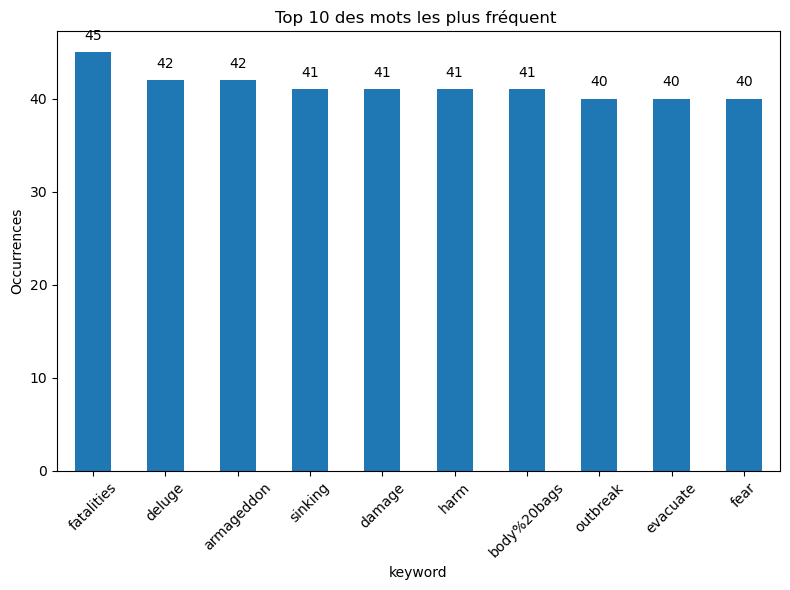

In [18]:
# Affichage des mot-cles les plus frequent

values =  data["keyword"].value_counts().head(10)
ax = values.plot(kind = "bar",figsize=(8,6) )
plt.title("Top 10 des mots les plus fréquent ")
plt.ylabel("Occurrences")

for i, v in enumerate(values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Target analyse

In [20]:
pd.set_option('display.max_columns', None)
data_1 = data[data["target"] == 1]
data_1

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
37,55,ablaze,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
46,66,ablaze,How the West was burned: Thousands of wildfire...,1
...,...,...,...,...
7542,10783,wreckage,Wreckage 'conclusively confirmed' as from miss...,1
7543,10784,wreckage,Wreckage 'Conclusively Confirmed' as From MH37...,1
7552,10795,wrecked,Israel wrecked my home. Now it wants my land. ...,1
7559,10808,wrecked,300K exotic car wrecked in train accident \nht...,1


In [21]:
data_0 = data[data["target"] == 0]
data_0

,id,keyword,text,target
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,@PhDSquares #mufc they've built so much hype a...,0
39,57,ablaze,Ablaze for you Lord :D,0
...,...,...,...,...
7578,10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,Three days off from work and they've pretty mu...,0
7580,10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,@engineshed Great atmosphere at the British Li...,0


# Text column analysis

In [23]:
data['longueur_text'] = data["text"].apply(len)
data

,id,keyword,text,target,longueur_text
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,52,ablaze,Crying out for more! Set me ablaze,0,34
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76
...,...,...,...,...,...
7578,10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0,48
7579,10831,wrecked,Three days off from work and they've pretty mu...,0,107
7580,10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93
7581,10833,wrecked,@engineshed Great atmosphere at the British Li...,0,104


In [24]:
cols = list(data.columns)
cols.remove('longueur_text')  
target_index = cols.index('target')  
cols.insert(target_index, 'longueur_text') 
data = data[cols]

In [25]:
# Tweet court (<10)
data[data['longueur_text'] < 10]

,id,keyword,text,longueur_text,target
1882,2703,crushed,Crushed,7,0
3667,5221,fatality,Fatality!,9,0
3670,5224,fatality,fatality,8,0
4890,6962,massacre,Bad day,7,0
4971,7088,meltdown,Meltdown,8,0
5115,7295,nuclear%20reactor,Err:509,7,0


In [26]:
# Tweet long (> 80)
data[data['longueur_text'] > 80 ]

,id,keyword,text,longueur_text,target
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,82,1
36,54,ablaze,@PhDSquares #mufc they've built so much hype a...,122,0
38,56,ablaze,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,140,1
40,59,ablaze,Check these out: http://t.co/rOI2NSmEJJ http:/...,114,0
42,62,ablaze,Had an awesome time visiting the CFC head offi...,120,0
...,...,...,...,...,...
7570,10821,wrecked,Cramer: Iger's 3 words that wrecked Disney's s...,88,0
7577,10829,wrecked,@widda16 ... He's gone. You can relax. I thoug...,107,0
7579,10831,wrecked,Three days off from work and they've pretty mu...,107,0
7580,10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,93,0


In [39]:
lemmas = ["break", "news", "nigeria", "flag", "set", "ablaze", "aba"]
sum =0
for token in lemmas:
    sum = len(token) + sum
print(sum )

64


In [45]:
lemmas = ["break", "news", "nigeria", "flag", "set", "ablaze", "aba"]
all(len(token) > 2 for token in lemmas)

True

In [49]:
import re
def clean_text(text):
        text = re.sub(r"http\S+|www\.\S+", "", text.lower())  # suppression des liens
        text = re.sub(r"@\w+","",text.lower())    # suppression des mentions
        text = re.sub(r"#\w+","",text.lower())    # suppression des hashtags
        text = re.sub(r"[0-9]@+","",text.lower())   # suppression des chiffres
        text = re.sub(r"[',\-_!;?.:'0-9]", " ", text.lower())   # suppression des symbole, ponctuations
        return text

text = "#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi"
txto = clean_text(text)
print(txto)

  breaking news nigeria flag set ablaze in aba  
